 [![Build Status](https://travis-ci.org/vincentcp/CardinalBSplines.svg?branch=master)](https://travis-ci.org/vincentcp/CardinalBSplines)
 [![Coverage Status](https://coveralls.io/repos/github/vincentcp/CardinalBSplines/badge.svg?branch=master)](https://coveralls.io/github/vincentcp/CardinalBSplines?branch=master)
 # CardinalBSplines

A Julia module for evaluating cardinal B splines and L2 inner products over cardinal B splines


In [2]:
using CardinalBSplines
using QuadGK
using Plots

`BSpline`

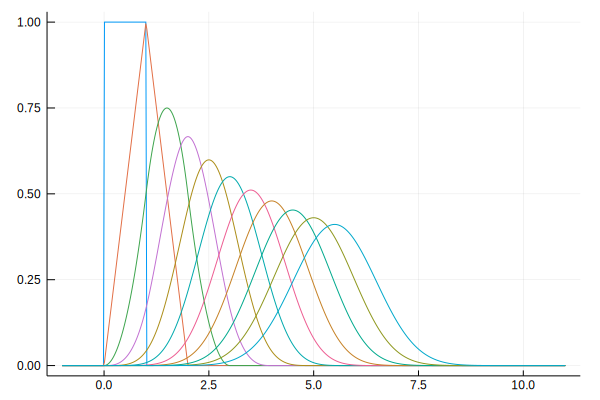

In [3]:
t = LinRange(-1,11,500)
plot(legend=false)
[plot!(t,BSpline(degree).(t)) for degree in 0:10]
plot!()

`PeriodicBSpline`

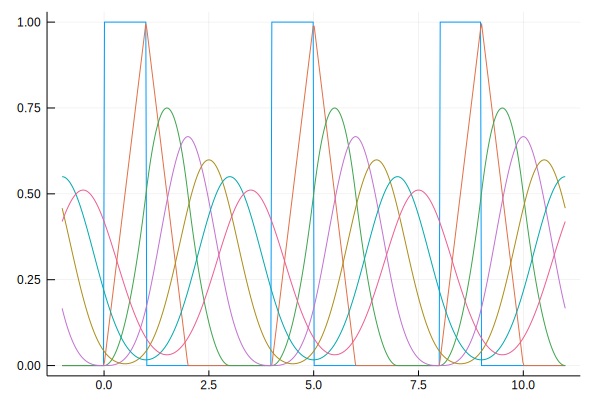

In [4]:
t = LinRange(-1,11,500)
plot(legend=false)
[plot!(t,PeriodicBSpline(degree,4).(t)) for degree in 0:6]
plot!()

`PeriodicCenteredBSpline`

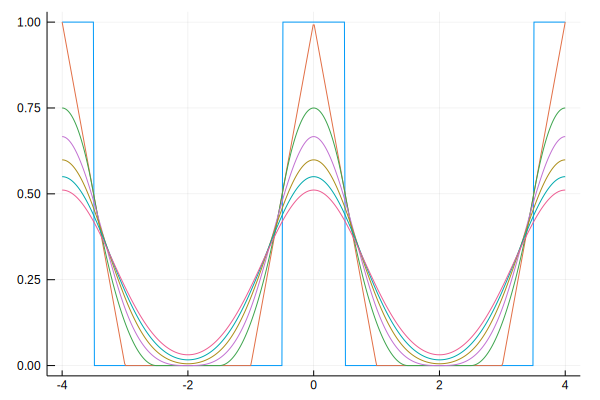

In [5]:
t = LinRange(-4,4,500)
plot(legend=false)
[plot!(t,PeriodicCenteredBSpline(degree, 4).(t)) for degree in 0:6]
plot!()

`BSplineDiff`

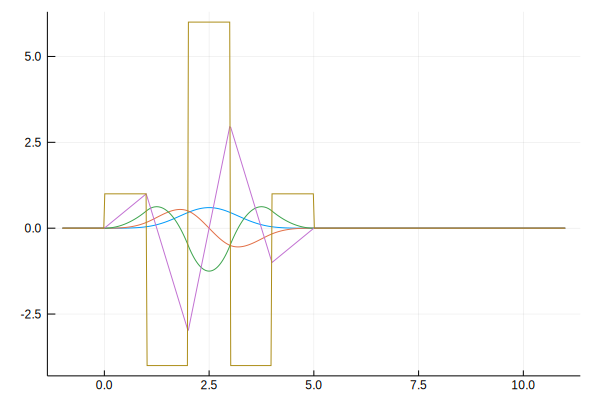

In [6]:
t = LinRange(-1,11,500)
plot(legend=false)
[plot!(t,BSplineDiff(4,diff).(t)) for diff in 0:4]
plot!()

`PeriodicBSplineDiff`

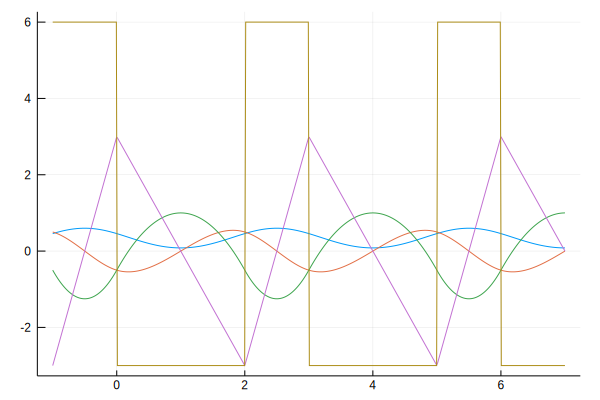

In [7]:
t = LinRange(-1,7,500)
plot(legend=false)
[plot!(t,PeriodicBSplineDiff(4,3,diff).(t)) for diff in 0:4]
plot!()

squared_spline_integral(N::Int)

In [8]:
squared_integrals = [squared_spline_integral(N) for N in 1:10]

10-element Array{Rational{BigInt},1}:
                  2//3                  
                 11//20                 
                151//315                
              15619//36288              
             655177//1663200            
           27085381//74131200           
         2330931341//6810804000         
        12157712239//37638881280        
     37307713155613//121645100408832    
 339781108897078469//1161157776629760000

In [9]:
squared_integrals_test = [QuadGK.quadgk(x->CardinalBSplines.evaluate_Bspline(Val{N}(),x,Float64)^2,LinRange(0,11,12)...)[1] for N in 1:10]

10-element Array{Float64,1}:
 0.6666666666666667 
 0.5499999999999999 
 0.4793650793650795 
 0.43041776895943445
 0.3939255651755637 
 0.3653708694854521 
 0.3422402613553404 
 0.32300939415699864
 0.30669310173798253
 0.2926226872314349 

In [10]:
@assert squared_integrals ≈ squared_integrals_test

shifted_spline_integral(m::Int,t::Int)

In [11]:
shifted_integrals = [shifted_spline_integral(N, t, BigFloat) for N in 1:10, t in 0:9]

10×10 Array{BigFloat,2}:
 0.666667  0.166667  0.0         0.0          …  0.0          0.0        
 0.55      0.216667  0.00833333  0.0             0.0          0.0        
 0.479365  0.23631   0.0238095   0.000198413     0.0          0.0        
 0.430418  0.243149  0.0402557   0.00138338      0.0          0.0        
 0.393926  0.24396   0.055202    0.00382388      0.0          0.0        
 0.365371  0.241788  0.067975    0.00731224   …  0.0          0.0        
 0.34224   0.238123  0.0785953   0.0115023       0.0          0.0        
 0.323009  0.233737  0.0873116   0.0160739       2.81146e-15  0.0        
 0.306693  0.229046  0.0944193   0.0207811       4.30982e-12  8.22064e-18
 0.292623  0.22428   0.100194    0.025452        2.03837e-10  4.1047e-14 

In [14]:
shifted_integrals_test = [QuadGK.quadgk(x->CardinalBSplines.evaluate_Bspline(Val{N}(),x-t,Float64)*
        CardinalBSplines.evaluate_Bspline(Val{N}(),x,Float64),LinRange(0,11,12)...)[1] for N in 1:10, t in 0:9]

10×10 Array{Float64,2}:
 0.666667  0.166667  0.0         0.0          …  0.0          0.0        
 0.55      0.216667  0.00833333  0.0             0.0          0.0        
 0.479365  0.23631   0.0238095   0.000198413     0.0          0.0        
 0.430418  0.243149  0.0402557   0.00138338      0.0          0.0        
 0.393926  0.24396   0.055202    0.00382388      0.0          0.0        
 0.365371  0.241788  0.067975    0.00731224   …  0.0          0.0        
 0.34224   0.238123  0.0785953   0.0115023       0.0          0.0        
 0.323009  0.233737  0.0873116   0.0160739       2.81146e-15  0.0        
 0.306693  0.229046  0.0944193   0.0207811       4.30982e-12  8.22064e-18
 0.292623  0.22428   0.100194    0.025452        2.03837e-10  4.1047e-14 

In [15]:
@assert shifted_integrals ≈ shifted_integrals_test